<div style="background-color: lightgreen; border-radius: 5px; padding: 10px;">
    <h4>LDa Topic Modeling</h4>
    <p>...</p>
</div>

### Imports

In [3]:
from preprocessing_functions import *
from topic_modeling_functions import *

import warnings
warnings.filterwarnings('ignore')

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Import (Lemmatised) Paragraphs

In [4]:
new_data = False

if new_data:
    INPUT_DIR = "../../../../../data/clean/city_pair_paragraphs3/"
    BATCHES = [5, 10, 20, 30]
    POS = ["NOUN", "VERB", "ADJ"]
    ONLY_ENGLISH_WORDS = True
    sort_by_paragraphs_count = True
    merged_POS = True

    data_list = import_lemmatised_paragraphs(INPUT_DIR,
                                             POS,
                                             BATCHES,
                                             ONLY_ENGLISH_WORDS=ONLY_ENGLISH_WORDS,
                                             merged_POS=merged_POS,
                                             sort_by_paragraphs=sort_by_paragraphs_count)
    
    # Merge into single dataframe
    frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
    citypairs = [citypair['city_pair'] for citypair in data_list]

    result = pd.concat(frames) #, keys=citypairs)
    result.set_index('paragraph_id', inplace=True)
    result.sort_index(inplace=True)
    result.reset_index(inplace=True)
else:
    result = pd.read_csv("../../../../../data/clean/311k_paragraphs_clean.csv")

result

,paragraph_id,city_pair,paragraph,merged_POS
0,1,berlin_milan,"after his tenure in academia, he continued to ...","['tenure', 'academia', 'month', 'year', 'trave..."
1,2,berlin_milan,one of the astronomers selected for the search...,"['astronomer', 'search', 'priest', 'invitation..."
2,3,berlin_milan,there are plenty of air connections between ye...,"['plenty', 'air', 'connection', 'city', 'conne..."
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","['fashion', 'year', 'language', 'monitor', 'ra..."
4,5,berlin_milan,when considering the commuter belts or metropo...,"['commuter', 'belt', 'area', 'datum', 'populat..."
...,...,...,...,...
310823,312682,warsaw_valencia,"since 2010, edelmann has intensified his conce...","['concert', 'activity', 'guest', 'performance'..."
310824,312683,warsaw_valencia,"born maria mokrzycka in lviv (now ukraine), sh...","['conservatory', 'debut', 'opera', 'opera', 't..."
310825,312684,warsaw_valencia,ayala was elected a fellow of the american aca...,"['fellow', 'art', 'science', 'member', 'societ..."
310826,312685,warsaw_valencia,o'conor was a co-founder of the dublin interna...,"['co', 'founder', 'competition', 'director', '..."


### Vectorize Documents

In [29]:
paragraphs = result.merged_POS
MIN_DF = 0.05
MAX_DF = 0.9

dictionary, corpus = vectorize(paragraphs,
                               MIN_DF=MIN_DF,
                               MAX_DF=MAX_DF)

### Train Single LDA Model

In [ ]:
N_TOPICS = 6
model_dict = train_lda_model(lemmatized_text=paragraphs,
                            dictionary=dictionary,
                            corpus=corpus,
                            MIN_DF=MIN_DF,
                            MAX_DF=MAX_DF,
                            N_TOPICS=N_TOPICS
                            # random_seed=0, should be added to allow the same results!
                            )

print(model_dict.keys())

### Load Desired Model

In [5]:
path = "../../../../../data/clean/lda_models/300k_paragraphs/lda_model_6topics_0_05min_0_9max/"
# path = os.getcwd() + '/' + 'lda_model_6_005min_09max'
# path = '../../../../../data/clean/lda_models/lda_model_6_005min_09max'
forced_path = os.path.abspath(path)

LOAD_VIS=True,
LOAD_DICT=True,
LOAD_TEXTS=True,
LOAD_COHERENCE_SCORE=True

if os.path.exists(forced_path):
    model_dict = load_lda_model(forced_path,
                           LOAD_VIS=LOAD_VIS,
                           LOAD_DICT=LOAD_DICT,
                           LOAD_TEXTS=LOAD_TEXTS,
                           LOAD_COHERENCE_SCORE=LOAD_COHERENCE_SCORE)
    print(model_dict.keys())
else:
    print('Path is invalid')

dict_keys(['lda_model', 'coherence_score', 'visualisation', 'texts', 'dictionary'])


### Visualisation

In [6]:
def visualise_topics(lda_model, corpus, dictionary, sort_topics=False):
    lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model)
    vis = gensimvis.prepare(lda_conv, corpus, dictionary, sort_topics=False)
    
    print(vis.topic_order)
    
    return vis

In [30]:
pyLDAvis.enable_notebook()

if 'visualisation' not in model_dict.keys():
    vis = visualise_topics(model_dict['lda_model'], corpus, dictionary)
else:
    vis = model_dict['visualisation']

vis

[1, 2, 3, 4, 5, 6]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.267029  0.036859       1        1  11.710659
1     -0.104190  0.039629       2        1  16.876065
2     -0.041620 -0.100392       3        1  22.998244
3      0.015942  0.220110       4        1  17.833813
4      0.058693 -0.203611       5        1  14.767390
5     -0.195854  0.007405       6        1  15.813829, topic_info=         Term          Freq         Total Category  logprob  loglift
167     opera  70651.000000  70651.000000  Default  30.0000  30.0000
179     study  69308.000000  69308.000000  Default  29.0000  29.0000
252       art  77713.000000  77713.000000  Default  28.0000  28.0000
604       win  53827.000000  53827.000000  Default  27.0000  27.0000
244  festival  46705.000000  46705.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
252       art  13051.516202  77713.991084   Topic6  -4.8495   0.0602
161      live   8758.022428  23400.069639   Topic6  -5.2484   0.8615
608  director   8212.783962  18839.222802   Topic6  -5.3127   1.0140
77       time   9998.802739  62202.907300   Topic6  -5.1159   0.0163
353    german   8292.600239  38923.224210   Topic6  -5.3030   0.2981

[610 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4219      2  0.990653  abstract
4219      6  0.008467  abstract
1834      2  0.070154  academic
1834      3  0.010985  academic
1834      4  0.025715  academic
...     ...       ...       ...
36        4  0.179969      year
36        5  0.089825      year
36        6  0.279344      year
81        2  0.966680  zodiacal
2500      2  0.966680      zuni

[1472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

### Get most relevant words per topic  
##### (used to create the topic vectors in the word embedding classification method)

In [39]:
all_topics = {}
num_terms = 15 # Adjust number of words to represent each topic
lambd = 0.2 # Adjust this accordingly based on tuning above

if not isinstance(vis, pyLDAvis._prepare.PreparedData):
    vis = visualise_topics(model_dict['lda_model'], corpus, dictionary)
    
for i in range(1,len(model_dict['lda_model'].get_topics())+1): #Adjust this to reflect number of topics chosen for final LDA model
    topic = vis.topic_info[vis.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [42]:
pd.DataFrame(all_topics).T
# display(all_topics)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,final,win,team,match,game,goal,club,league,champion,championship,season,score,round,tournament,football
Topic 2,exhibition,art,museum,gallery,exhibit,painting,collection,paint,portrait,artist,sculpture,fashion,design,contemporary,painter
Topic 3,war,embassy,army,diplomatic,ambassador,treaty,protest,force,mission,arrest,government,police,attack,party,minister
Topic 4,opera,festival,perform,orchestra,symphony,concert,music,film,sing,theatre,performance,role,premiere,tour,band
Topic 5,railway,route,line,operate,flight,station,service,airline,airport,train,passenger,speed,aircraft,rail,network
Topic 6,study,school,professor,university,graduate,bear,degree,research,college,teach,science,education,philosophy,father,doctorate


### Word-Topic Distribution

In [7]:
N_TOPICS = len(model_dict['lda_model'].get_topics())
MAX_WORDS = 8

for i in range(N_TOPICS):
    topic_words = model_dict['lda_model'].show_topic(i, topn=MAX_WORDS)
    print(i+1, [(x[0], round(x[1], 3)) for x in topic_words])
    print()

1 [('win', 0.035), ('final', 0.022), ('season', 0.019), ('club', 0.018), ('team', 0.018), ('play', 0.015), ('match', 0.014), ('game', 0.013)]

2 [('art', 0.035), ('work', 0.026), ('exhibition', 0.016), ('museum', 0.013), ('include', 0.011), ('gallery', 0.011), ('painting', 0.009), ('exhibit', 0.009)]

3 [('war', 0.008), ('german', 0.007), ('year', 0.006), ('time', 0.005), ('return', 0.005), ('city', 0.005), ('government', 0.005), ('leave', 0.004)]

4 [('opera', 0.038), ('festival', 0.024), ('perform', 0.021), ('music', 0.017), ('orchestra', 0.016), ('film', 0.014), ('include', 0.014), ('tour', 0.014)]

5 [('service', 0.016), ('city', 0.015), ('line', 0.012), ('company', 0.011), ('train', 0.011), ('railway', 0.01), ('station', 0.01), ('route', 0.01)]

6 [('study', 0.037), ('bear', 0.019), ('work', 0.017), ('school', 0.017), ('year', 0.015), ('university', 0.012), ('professor', 0.012), ('move', 0.009)]



### Document (=paragraphs) topic distribution

In [8]:
import pandas as pd

transformed_docs = model_dict['lda_model'].load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i+1) for i in range(N_TOPICS)])

In [25]:
topic_distributions.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
0,0.000765,0.001501,0.770121,0.001536,0.001327,0.224750
1,0.195772,0.498009,0.302968,0.001100,0.000950,0.001201


### Rename Topics

In [47]:
# Give Topics sensible names
topic_distributions_renamed_cols=topic_distributions.rename(columns = { 'topic_1': 'lda_sport',
                                        'topic_2': 'lda_art',
                                        'topic_3': 'lda_diplomacy',
                                        'topic_4': 'lda_entertainment',
                                        'topic_5': 'lda_transportation',
                                        'topic_6': 'lda_education'}, inplace = False)

topic_distributions_renamed_cols.head(2)

,lda_sport,lda_art,lda_diplomacy,lda_entertainment,lda_transportation,lda_education
0,0.000765,0.001501,0.770121,0.001536,0.001327,0.224750
1,0.195772,0.498009,0.302968,0.001100,0.000950,0.001201


### Topic Distributions

In [48]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts()

lda_entertainment     65366
lda_diplomacy         57828
lda_education         55784
lda_art               52721
lda_transportation    47008
lda_sport             32121
dtype: int64

In [49]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts(normalize=True)

lda_entertainment     0.210296
lda_diplomacy         0.186045
lda_education         0.179469
lda_art               0.169615
lda_transportation    0.151235
lda_sport             0.103340
dtype: float64

### Merge paragraphs with topic distributions

In [50]:
updated_results = pd.concat([result, topic_distributions_renamed_cols],
                  axis = 1)

In [51]:
 updated_results.head(2) # updated_results[topic_distributions_renamed_cols.columns]

,paragraph_id,city_pair,paragraph,merged_POS,lda_sport,lda_art,lda_diplomacy,lda_entertainment,lda_transportation,lda_education
0,1,berlin_milan,"after his tenure in academia, he continued to ...","['tenure', 'academia', 'month', 'year', 'trave...",0.000765,0.001501,0.770121,0.001536,0.001327,0.224750
1,2,berlin_milan,one of the astronomers selected for the search...,"['astronomer', 'search', 'priest', 'invitation...",0.195772,0.498009,0.302968,0.001100,0.000950,0.001201


### Get dominant topic and score of chunked dataframe

In [15]:
import numpy as np
nr_of_chunks = (len(updated_results) // 10000) + 1

chunked_dataframe = np.array_split(updated_results, nr_of_chunks)

In [16]:
# This may take a while

from tqdm.notebook import tqdm

for i, subdataframe in enumerate(tqdm(chunked_dataframe)):
    chunked_dataframe[i] = pd.concat([subdataframe, subdataframe[topic_distributions_renamed_cols.columns].agg(['idxmax','max'],axis=1)], axis=1)

  0%|          | 0/32 [00:00<?, ?it/s]

In [17]:
final_df = pd.concat(chunked_dataframe,axis=0)

In [52]:
final_df_renamed_cols = final_df.rename(columns = { 'idxmax': 'lda_dominant',
                                        'max': 'lda_dominant_score'}, inplace = False)

In [57]:
final_df_renamed_cols['lda_dominant'] = final_df_renamed_cols['lda_dominant'].replace({'lda_diplomatic':'lda_diplomacy'})

In [58]:
final_df_renamed_cols.head(2)

,paragraph_id,city_pair,paragraph,merged_POS,lda_sport,lda_art,lda_diplomacy,lda_entertainment,lda_transportation,lda_education,lda_dominant,lda_dominant_score
0,1,berlin_milan,"after his tenure in academia, he continued to ...","['tenure', 'academia', 'month', 'year', 'trave...",0.000765,0.001501,0.770121,0.001536,0.001327,0.224750,lda_diplomacy,0.770121
1,2,berlin_milan,one of the astronomers selected for the search...,"['astronomer', 'search', 'priest', 'invitation...",0.195772,0.498009,0.302968,0.001100,0.000950,0.001201,lda_art,0.498009


In [74]:
three_city_pairs = final_df_renamed_cols[final_df_renamed_cols['city_pair'].isin(['paris_milan', 'barcelona_manchester', 'warsaw_prague'])]

In [78]:
display(three_city_pairs.groupby('city_pair')['lda_dominant'].value_counts())

city_pair             lda_dominant      
barcelona_manchester  lda_sport              727
                      lda_transportation      43
                      lda_entertainment       37
                      lda_diplomacy           26
                      lda_education           17
                      lda_art                 16
paris_milan           lda_art               1091
                      lda_entertainment      705
                      lda_transportation     410
                      lda_diplomacy          366
                      lda_education          347
                      lda_sport              332
warsaw_prague         lda_diplomacy          352
                      lda_transportation     116
                      lda_education          113
                      lda_entertainment      113
                      lda_art                 81
                      lda_sport               41
Name: lda_dominant, dtype: int64

### Save document topic distribution

In [59]:
final_df_renamed_cols.to_csv('..\..\..\..\..\data\clean\lda_classified_30cities_435citypairs_311k_paragraphs.csv', index=False)

### Graphed density of the grouped topic scores

Text(0, 0.5, 'Density')

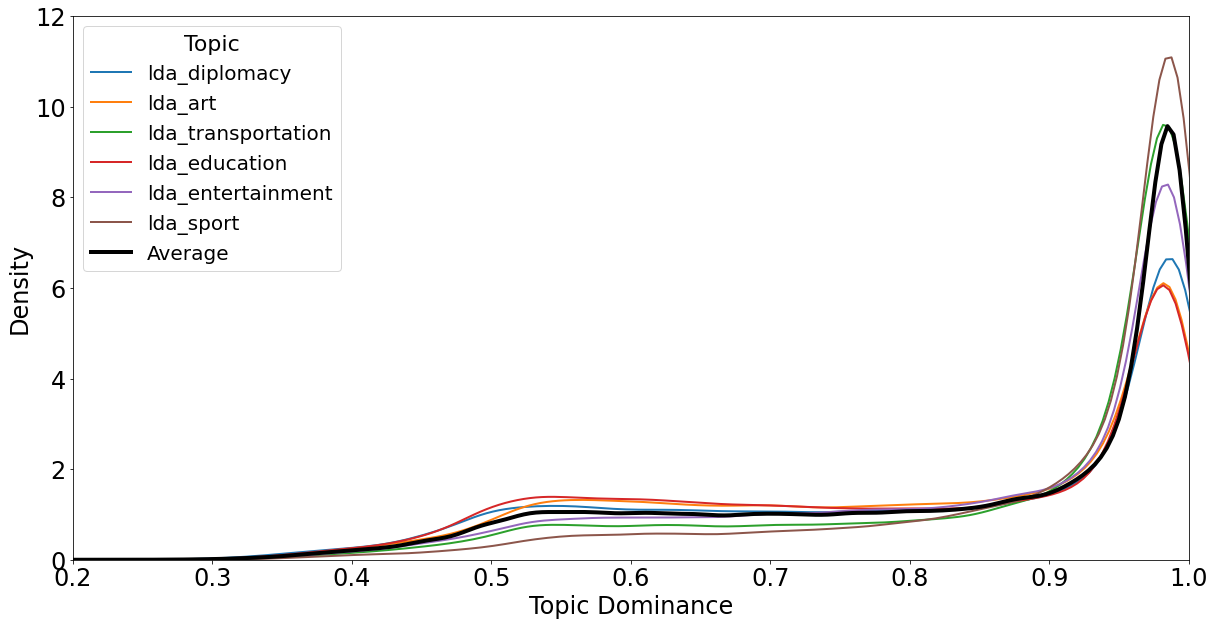

In [81]:
# !pip install seaborn
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,10))

a = final_df_renamed_cols.groupby('lda_dominant')

# Iterate through the five airlines
for topic in final_df_renamed_cols['lda_dominant'].unique():
    b = a['lda_dominant_score'].get_group(topic)
    
    #     b.plot.density(color='green')
    # plt.title('Density plot for Speeding')
    # plt.show()
    
    sns.distplot(b, hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = topic)
    
# Plot formatting
sns.distplot(final_df_renamed_cols['lda_dominant_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 4},
                 color = 'black',
                 label = 'Average')

plt.legend(prop={'size': 20}, title = 'Topic', title_fontsize=22)
# plt.title('Score Density of the dominant topics grouped by topic', fontsize=24)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.xlabel('Topic Dominance')
plt.ylim(0, 12)
plt.xlim(0.2, 1)
plt.ylabel('Density')

# Extras

### Train Multiple LDA Models

In [ ]:
# TOPIC_SELECTION = range(6, 7,1)
# list(TOPIC_SELECTION)

In [ ]:
"""
%%time

OUTPUT_DIR = '../../../../../data/clean/lda_models/300k_paragraphs/'
TOPIC_SELECTION = range(6, 7,1)
paragraphs = result.merged_POS
MIN_DF = 1
MAX_DF = 1.0
GET_COHERENCE_SCORE = True
N_ITERATIONS=1000

# Vectorization
dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

models = compare_lda_models(OUTPUT_DIR=OUTPUT_DIR,
                            TOPIC_SELECTION=TOPIC_SELECTION,
                            LEMMATIZED_TEXT=paragraphs,
                            DICTIONARY=dictionary,
                            CORPUS=corpus,
                            MIN_DF=MIN_DF,
                            MAX_DF=MAX_DF,
                            N_ITERATIONS=N_ITERATIONS,
                            # optimize_interval=10 by default
                            PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat',
                            GET_COHERENCE_SCORE=GET_COHERENCE_SCORE,
                            COHERENCE='c_v')
"""

### Save LDA Model

In [ ]:
"""
import os

OUTPUT_DIR = os.getcwd()
MODEL_NAME = 'lda_model_6_005min_09max'
MODEL = model_dict['lda_model']
COHERENCE_SCORE = model_dict['coherence_score']
TEXTS = paragraphs
DICTIONARY = model_dict['dictionary']
CORPUS = model_dict['corpus']
VIS = vis

SAVE_VIS = True
SAVE_DICT = True
SAVE_TEXTS = True
SAVE_COHERENCE_SCORE = True

save_lda_model(MODEL=model['lda_model'],
                OUTPUT_DIR=OUTPUT_DIR,
                NAME=MODEL_NAME,
                COHERENCE_SCORE=COHERENCE_SCORE,
                DICTIONARY=DICTIONARY,
                CORPUS=CORPUS,
                TEXTS=TEXTS,
                VIS=VIS,
                SAVE_VIS=SAVE_VIS,
                SAVE_DICT=SAVE_DICT,
                SAVE_TEXTS=SAVE_TEXTS,
                SAVE_COHERENCE_SCORE=SAVE_COHERENCE_SCORE
              )
"""

### Load Multiple LDA Models

In [ ]:
"""
INPUT_DIR = '...'
LOAD_VIS = True
LOAD_DICT = True
LOAD_COHERENCE_SCORE = True


models = load_lda_models(INPUT_DIR=INPUT_DIR,
                         LOAD_VIS=LOAD_VIS,
                         LOAD_DICT=LOAD_DICT,
                         LOAD_COHERENCE_SCORE=LOAD_COHERENCE_SCORE)
"""

### Calculate Coherence Score

In [ ]:
""""
MODEL = None
LEMMATIZED_TEXT = None
DICTIONARY = None

if not None in [MODEL, LEMMATIZED_TEXT, DICTIONARY]:
    coherence_score = calculate_coherence_score(MODEL,
                                                LEMMATIZED_TEXT,
                                                DICTIONARY,
                                                COHERENCE='c_v')
"""